# Loan Prediction using ML Algorithms

In today's fast-paced financial landscape, loan prediction plays a pivotal role in assessing creditworthiness and mitigating risk for lending institutions. The ability to accurately predict whether a loan applicant will default or repay their loan is crucial for ensuring sustainable lending practices and maximizing profitability. With the advancements in technology and the ever-increasing availability of data, machine learning (ML) models have emerged as powerful tools for loan prediction, offering improved accuracy and efficiency compared to traditional statistical approaches.

## REPORT STRUCTURE

This report aims to provide a comprehensive analysis of various ML models for loan prediction, with the ultimate goal of selecting the most suitable model for production deployment. By examining different ML algorithms and evaluating their performance metrics, this study aims to assist financial institutions in making informed decisions when implementing loan prediction systems.

- **We will start with the Exploratory Data Analysis**
- **Then we'll look into Data Cleaning (if necessary)**
- **Finally we'll try our various ML models and try to fit our data accordingly**
- **Choose the Best Model for the production**


## Aim:
***The aim of this project is to develop an accurate and reliable loan prediction model using machine learning techniques. 
The project seeks to identify the optimal set of hyperparameters that will yield the highest accuracy in predicting loan outcomes.***

In [1]:
# Importing Necessary Libraries and Tools for the Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


In [2]:
# Supressing Warnings 

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) plays a crucial role in any data-driven project, including loan prediction using ML models. EDA involves investigating and understanding the characteristics, patterns, and relationships within the dataset before applying any ML algorithms. 

In [3]:
df = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv", sep=',')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### We should know where we have categorical and numerical data in our dataset
#### ***We can see a glance of our data using the df.info()***

In [4]:
df = df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


#### ***Hence, we can conclude that we have a mixture of categorical as well as numerical data in our dataset. These data can help us to analyze the dataset and help us gain several insights.***

#### Let us check what is the distribution of Age of the people in our dataset

Text(0.5, 1.0, 'Age Count')

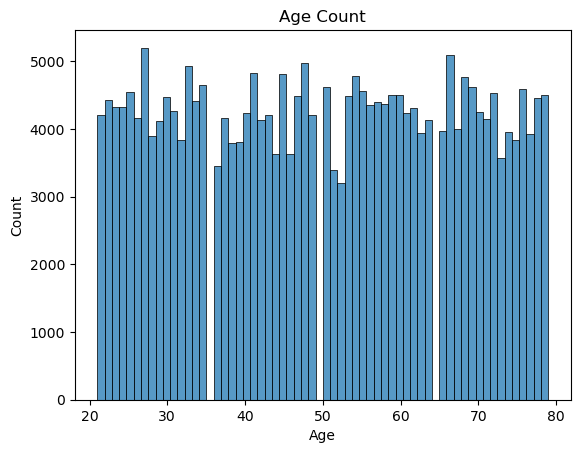

In [5]:
sns.histplot(df.Age)
plt.xlabel("Age")
plt.title("Age Count")

#### **From the above Bar Plot we can clearly deduce that we've a overall equally balanced Age distribution in our dataset.**

#### Now let us check how many professions do we have in total

In [6]:
df.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

#### **This gives us an idea that we have almost different types of people with different professions equally distributed in the dataset.**

### Now let's check the distribution of Marital Status in our dataset

Text(0, 0.5, 'Frequency')

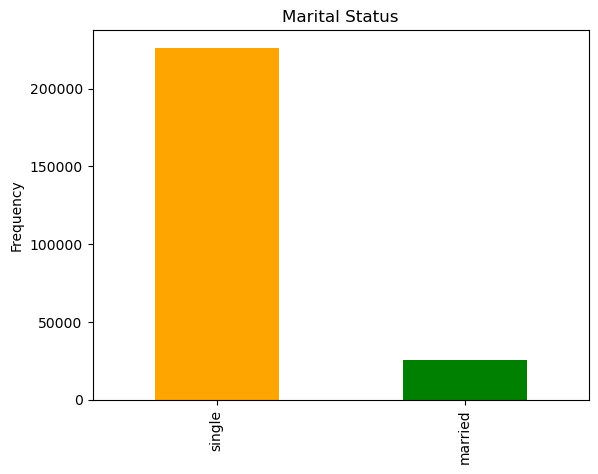

In [7]:
MaritalStatus = df['Married/Single'].value_counts()
MaritalStatus.plot.bar(color=['orange', 'green'])
plt.title("Marital Status")
plt.ylabel("Frequency")

#### **This shows that we have maximum of single Individuals than Married couples in our dataset**

### Also from the insights from the Marital Status, let's check what's the distribution of their **House & Car Ownership** 

Text(0.5, 1.0, 'Property Ownership')

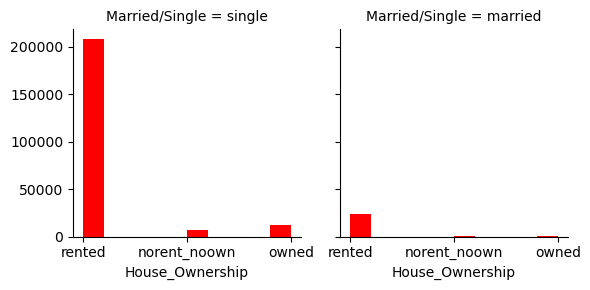

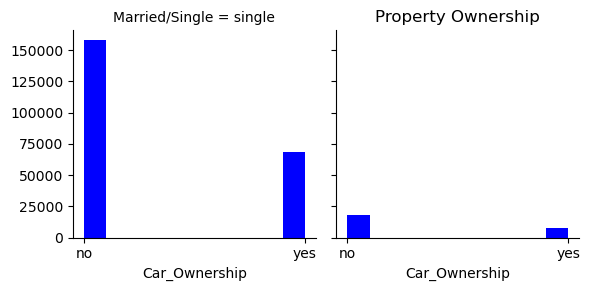

In [8]:
# Property Ownership w.r.t Marital Status

plot = sns.FacetGrid(df, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(df, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')

plt.title("Property Ownership")

#### From the above Facet Grid Plot we can get a clear idea that 
- #### Single Individuals live in Rented_Household with Almost No Car_Ownership, whereas 
- #### Married Couples prefer living in Rented_Household with a fairly equally distributed Car_Ownership

### Moving Forward let's check out the distribution of people from various states in our Dataset

Text(0, 0.5, 'Frequency')

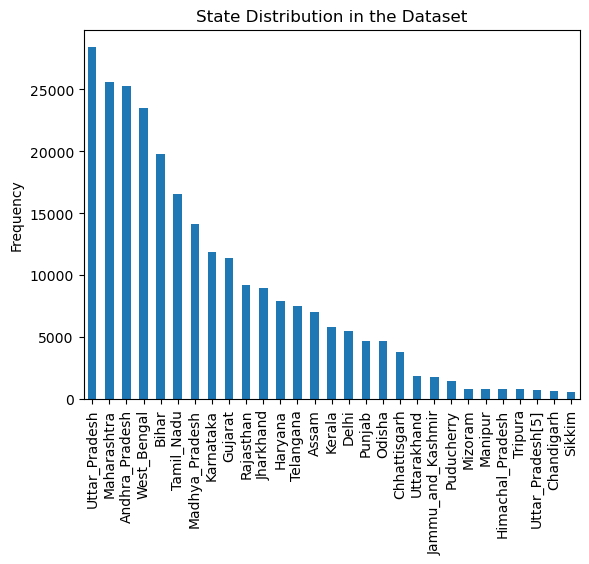

In [9]:
StateDistribution = df.STATE.value_counts()
StateDistribution.plot.bar()
plt.xticks(rotation=90)
plt.title("State Distribution in the Dataset")
plt.ylabel("Frequency")

#### Here, we see that maximum population are from Uttar Pradesh followed by Maharashtra & Andhra Pradesh

#### Now let's move on forward and Clean our Dataset for further Computations

# Data Cleaning

In [10]:
# Having a lok on our dataset

df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### Let's Start this by Handling Missing Values

In [11]:
totalMissingVals = df.isnull().sum().sort_values(ascending=True)
totalMissingVals

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#### Voila! We can see that we don't have any missing values.

### Checking Duplicates

In [12]:
df.index.is_unique

True

#### So, our dataset is free from any duplicate values.

### Handling Outliers
#### **Let's check if there exists any possible outliers in Income, as it is the only feature that will have much more importance in our dataset**

<Axes: >

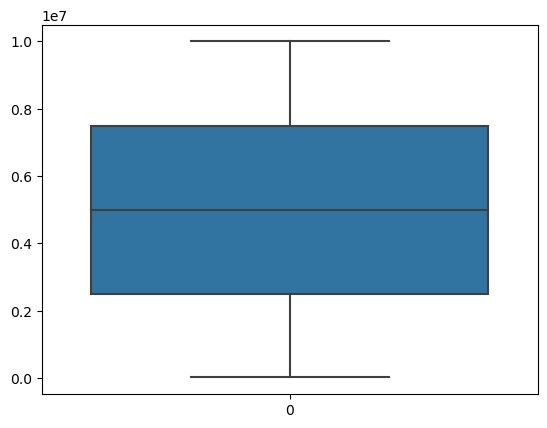

In [13]:
sns.boxplot(df.Income)

#### Hence we see that there's no specific Outliers in Income

# Data Preprocessing
#### Before feeding the Data into the Model, we must assure that the Dataset is Preprocessed.

### Feature Engineering
A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones

#### Removing Unnecessary Feature

In [14]:
df_en = df.copy()

# Let's drop the unnecessary Features
df_en = df_en.drop('CITY',axis=1)
df_en = df_en.drop('STATE',axis=1)

### Encoding Categorical Data
#### Encoding categorical Data is one of the important steps in Data Preprocessing.

In [15]:
# Using Label Encoder to encode our Categorical Data

encoder = LabelEncoder()

categorical = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

for feature in categorical:
    df_en[feature] = encoder.fit_transform(df_en[feature])

df_en.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


In [16]:
# Let's see what Encoding Label Encoder has done to our Profession Feature

unique_features = df['Profession'].unique()
encoded_features = df_en['Profession'].unique()
for feature, encoded_feature in zip(unique_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'Mechanical_engineer' : 33
'Software_Developer' : 43
'Technical_writer' : 47
'Civil_servant' : 11
'Librarian' : 31
'Economist' : 20
'Flight_attendant' : 25
'Architect' : 2
'Designer' : 18
'Physician' : 37
'Financial_Analyst' : 23
'Air_traffic_controller' : 0
'Politician' : 39
'Police_officer' : 38
'Artist' : 4
'Surveyor' : 46
'Design_Engineer' : 17
'Chemical_engineer' : 9
'Hotel_Manager' : 28
'Dentist' : 16
'Comedian' : 12
'Biomedical_Engineer' : 6
'Graphic_Designer' : 27
'Computer_hardware_engineer' : 13
'Petroleum_Engineer' : 36
'Secretary' : 42
'Computer_operator' : 14
'Chartered_Accountant' : 7
'Technician' : 48
'Microbiologist' : 34
'Fashion_Designer' : 22
'Aviator' : 5
'Psychologist' : 40
'Magistrate' : 32
'Lawyer' : 30
'Firefighter' : 24
'Engineer' : 21
'Official' : 35
'Analyst' : 1
'Geologist' : 26
'Drafter' : 19
'Statistician' : 44
'Web_designer' : 50
'Consultant' : 15
'Chef' : 8
'Army_officer' : 3
'Surgeon' : 45
'Scientist' : 41
'Civil_engineer' : 10
'Industrial_Engineer' : 2

In [17]:
# Similarly Le's check for House Ownership

unique_features = df['House_Ownership'].unique()
encoded_features = df_en['House_Ownership'].unique()
for feature, encoded_feature in zip(unique_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'rented' : 2
'norent_noown' : 0
'owned' : 1


In [18]:
df_en.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

### Feature Selection
#### Now we will construct a `heatmap()`, using the *seaborn* library with a newly formed data frame, 'new_data'.

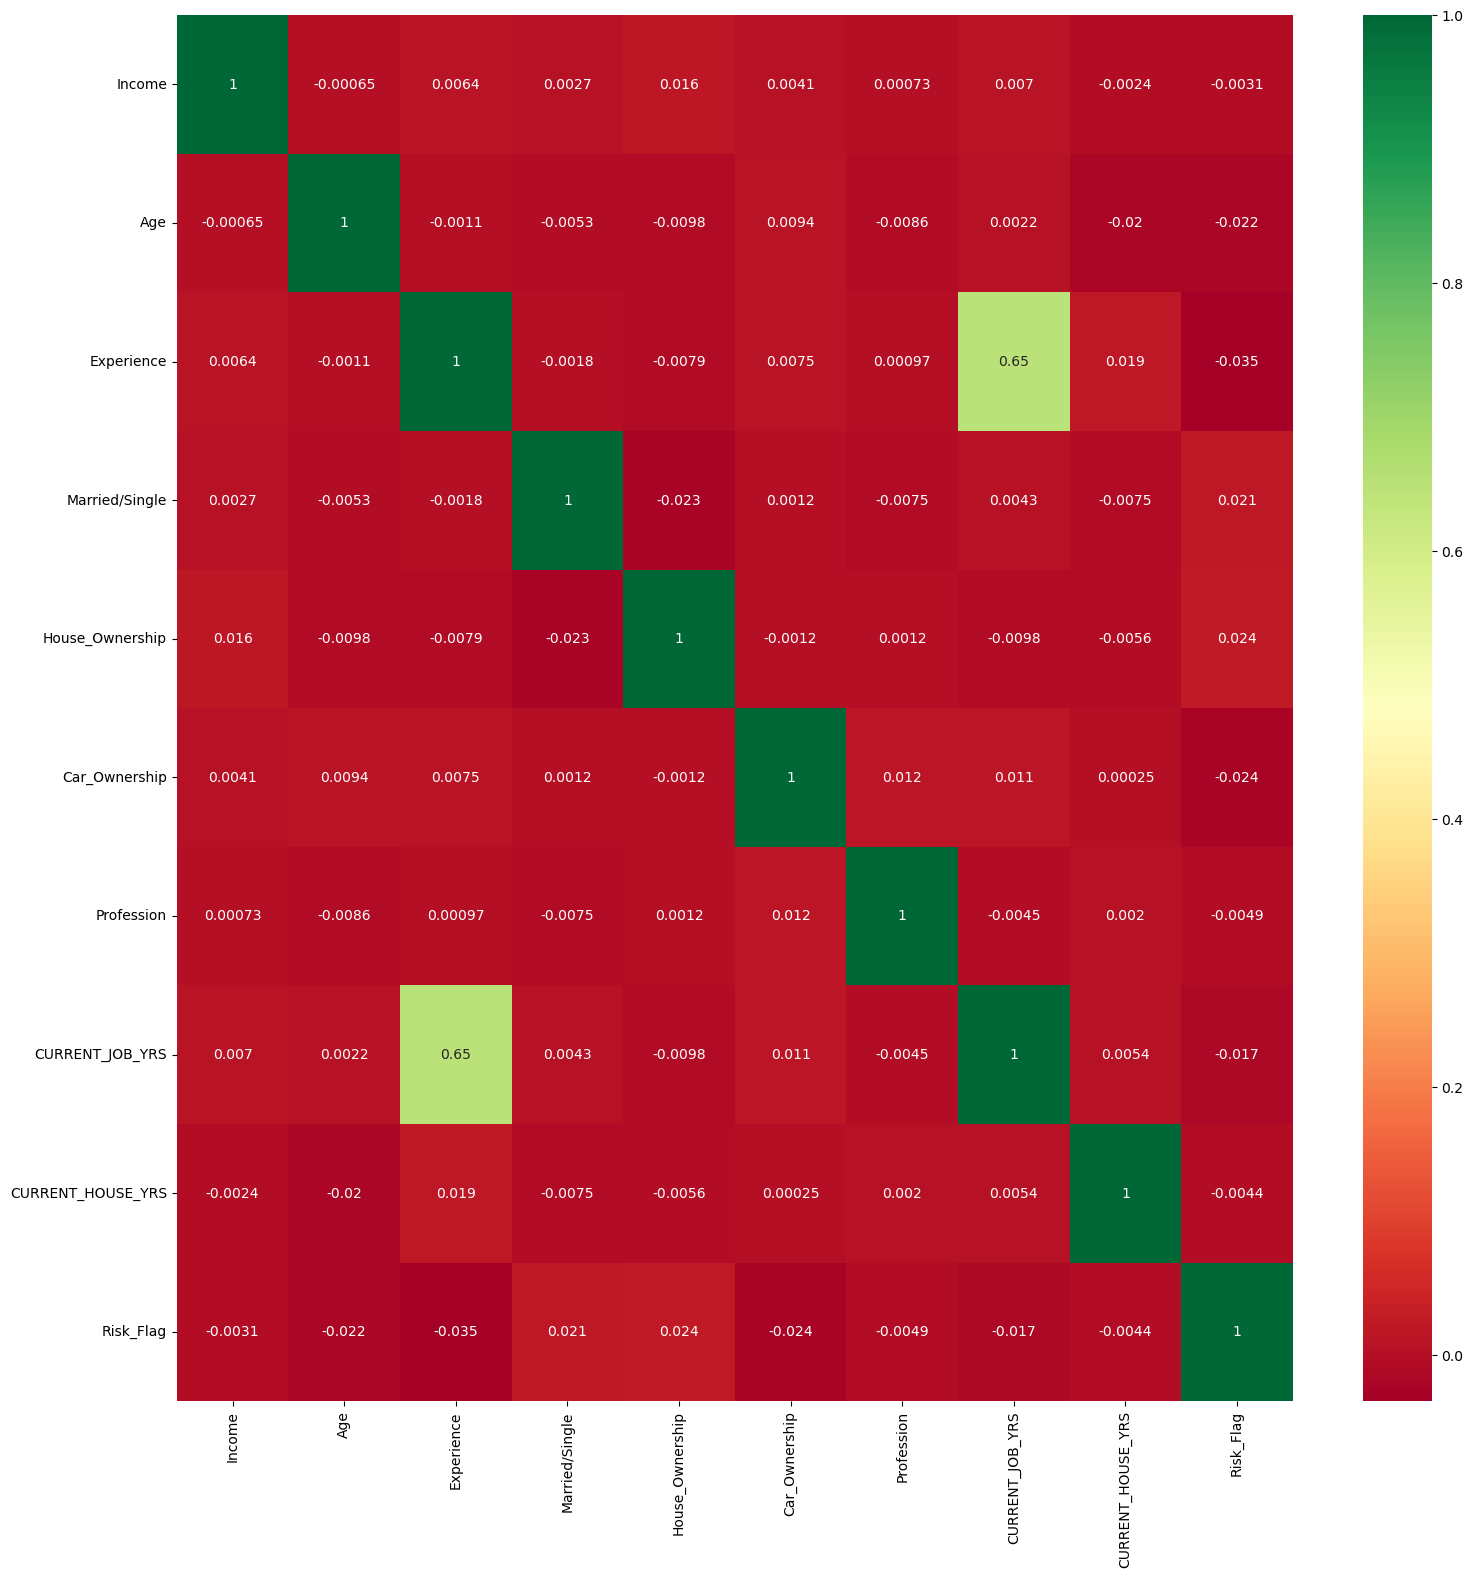

In [19]:
plt.figure(figsize=(18,18))
sns.heatmap(df_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

#### Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'Risk_Factor'.

In [20]:
features = df_en.corr()['Risk_Flag'].sort_values()
features

Experience          -0.034523
Car_Ownership       -0.024036
Age                 -0.021809
CURRENT_JOB_YRS     -0.016942
Profession          -0.004900
CURRENT_HOUSE_YRS   -0.004375
Income              -0.003091
Married/Single       0.021092
House_Ownership      0.023622
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

### Feature Scaling

In [21]:
df_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


#### Here, we should scale our data as they are not in the same scale

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in [df_en.columns]:
    df_en[i] = scaler.fit_transform(df_en[i])

df_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.505535,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.195940,0.458948,0.294571,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.260000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.520000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.760000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All features are now scaled, moving forward we're left with Modelling and choosing the best Model.

# Modeling
#### Let's Prepare our Training and Testing Datasets.

In [23]:
# Setting up Training & Testing DFs

X = df_en.drop(columns='Risk_Flag')
y = df_en['Risk_Flag']

#### Defining a Function to Test and See Scores of our Different Models

In [24]:
def useModel(model, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plotting confusion matrix
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::-1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")
    

### Applying Different Models

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     66329
         1.0       0.53      0.51      0.52      9271

    accuracy                           0.89     75600
   macro avg       0.73      0.73      0.73     75600
weighted avg       0.88      0.89      0.88     75600



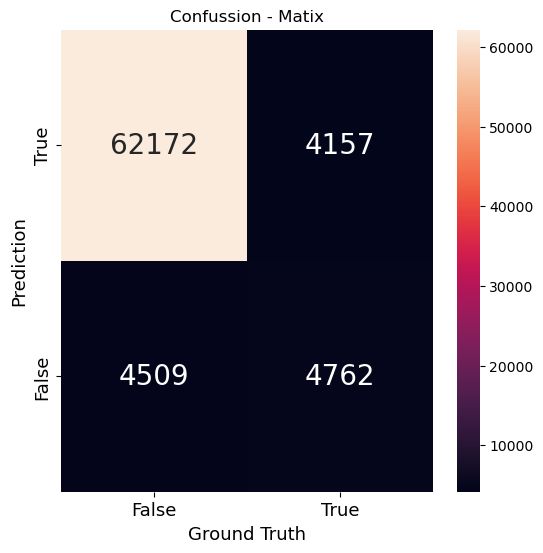

In [25]:
# Using K-Nearest-Neighborhood

from sklearn.neighbors import KNeighborsClassifier

useModel(KNeighborsClassifier(n_neighbors=3), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     66329
         1.0       0.51      0.58      0.54      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



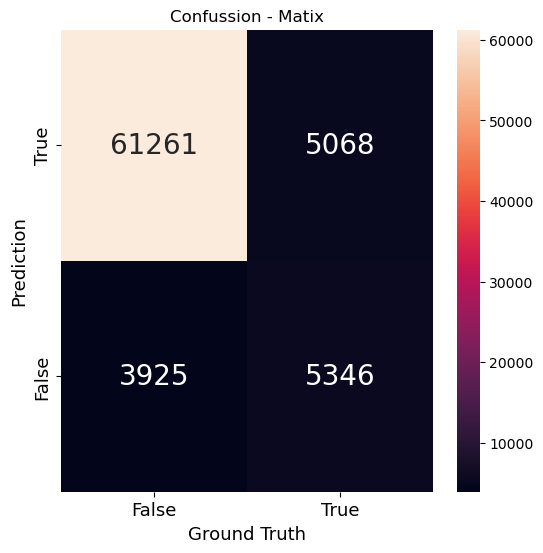

In [26]:
# Using Decision-Tree-Classifier

from sklearn.tree import DecisionTreeClassifier

useModel(DecisionTreeClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



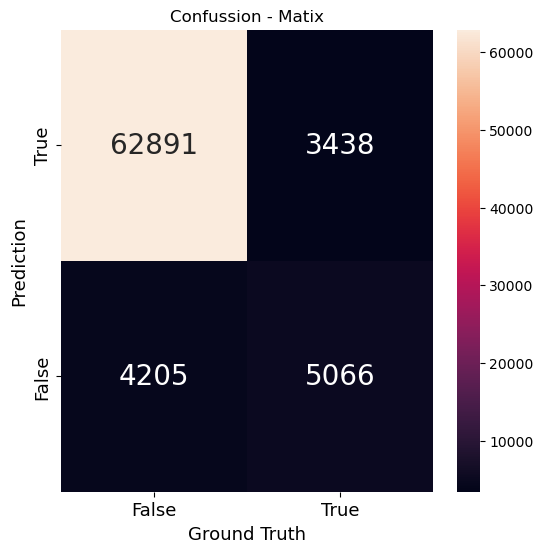

In [27]:
# Using Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

useModel(RandomForestClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     66329
         1.0       0.58      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.76      0.75      0.75     75600
weighted avg       0.89      0.90      0.90     75600



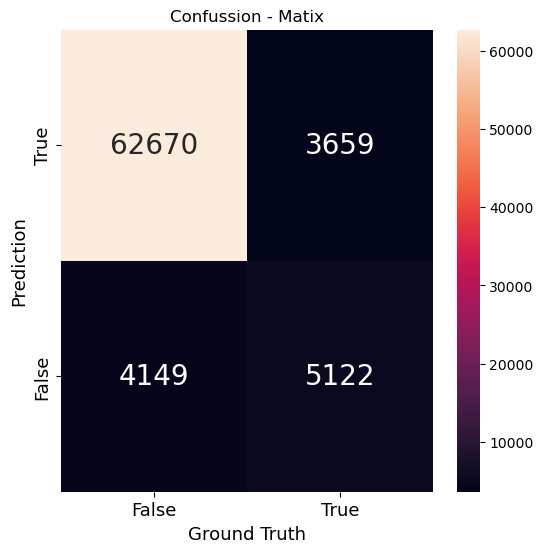

In [28]:
# Using Bagging Classifier

from sklearn.ensemble import BaggingClassifier

useModel(BaggingClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.53      0.56      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.74      0.75     75600
weighted avg       0.89      0.90      0.90     75600



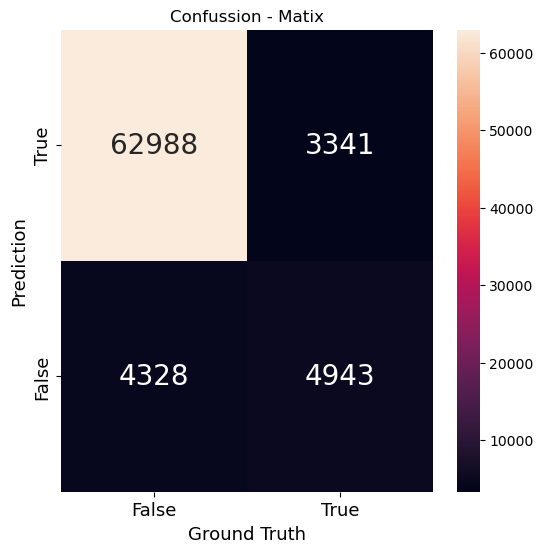

In [29]:
# Using Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

useModel(ExtraTreesClassifier(), X, y)

## Model Selection
#### We see that **Random Forrest Classifier** performs the best among all the Models for our Dataset, hence we select **Random Forrest Classifier** for our Production.


In [30]:
# Let's see the Train & Test Accuracies

def get_accuracy(X_data, y_data, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)))
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))

In [31]:
get_accuracy(X, y, RandomForestClassifier())

Test Accuracy :  0.898994708994709
Train Accuracy :  0.9373469387755102


#### Hence, we conclude by showing our final outcomes i.e., 
#### TEST accuracy of 89.88% ~ 90% and,
#### TRAIN acccuracy of 93.73% ~ 94%

## Hyperparameter Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 20),
    'max_depth': [None] + list(range(5, 20, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestClassifier()

search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', cv=3, n_iter=10)
search.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d0dff7c9f30>},
                   scoring='accuracy')

In [33]:
# Retrieving the best hyperparameters
best_params = search.best_params_
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 15}

In [34]:
best_model = search.best_estimator_
get_accuracy(X, y, best_model)

Test Accuracy :  0.8985714285714286
Train Accuracy :  0.9083560090702948


Hence, we tuned our model so that it performs the best with the above **hyperparameters.**

#### BEST TEST Accuracy of 89.85% ~ 90% and,
#### BEST TRAIN Acccuracy of 90.83% ~ 91%

## Dumping our best Model

In [35]:
import pickle

pickle.dump(best_model, open('loan_pred_model.pkl', 'wb'))

# Outcome Summary:

**Improved Loan Prediction Accuracy:** The project expects to achieve an enhanced level of loan prediction accuracy compared to previous models or baseline approaches. By leveraging the power of the RandomForestClassifier algorithm and fine-tuning the hyperparameters through Random Search, the aim is to develop a robust model that can effectively predict loan outcomes with high precision.

**Identification of Optimal Hyperparameters:** The grid search process helped us identify the optimal combination of hyperparameters, such as the number of estimators, maximum depth, and maximum features, for the RandomForestClassifier. The expected outcome is to determine the best configuration that maximizes the model's predictive performance.

**Enhanced Risk Management:** The accurate loan prediction model can assist lending institutions in improving their risk management practices. By identifying potential defaulters or high-risk applicants, financial institutions can make more informed decisions regarding loan approvals, interest rates, and credit limits. This expected outcome contributes to minimizing financial losses and maintaining a healthy loan portfolio.

**Insights into Feature Importance:** The RandomForestClassifier algorithm provides information about feature importance, allowing the identification of key factors that significantly influence loan outcomes. By analyzing the feature importance rankings, the project expects to gain valuable insights into the critical variables contributing to loan repayment and default probabilities. This information can aid in developing targeted strategies for risk assessment and mitigation.

**Framework for Model Selection**: The project aims to establish a framework for selecting the most suitable ML model for loan prediction. By employing Random Search Cross Validation and evaluating the performance of different hyperparameter combinations, the expected outcome is to provide guidance on the optimal configuration for the RandomForestClassifier. This framework can serve as a basis for future model selection processes in loan prediction tasks.